In [1]:
#import useful libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import json
import calendar
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [24]:
#import dataset 

df = pd.read_csv(r"C:\Users\Valtteri Kimmo\Downloads\dataset_for_datascience_assignment.csv")  

df.head(10)



,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
5,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
6,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
7,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-14 00:00:00.000,2020-10-14 00:00:00.000,8,0.0,0.0,1.0,0.0,0.0,19.228,1.0,19.266,19.304,19.228,android,0.0,0.0,1.0,NaN,True,5.0,1.0,NaN,NaN,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
8,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
9,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


We get better understanding for the dataset. At first glance data seems to be in pretty good shape. I need to do couple changes for datattypes to make data more easily accesible but overall data looks almost good to go. 

Lets do these changes right away. I notice "PURCHASE_COUNT_BY_STORE_TYPE" column has pretty interesting datatype which is not so easily accesible if I were to try make plots from it. I have to change that first. 


In [25]:
#String to dictionary
df_expanded = df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(json.loads).apply(pd.Series)
#combine new columns with original dataframe
df = pd.concat([df, df_expanded], axis=1)


df.head(10)

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,0,0,0,0
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,0,0,1,0
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",1,9,0,9,0
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,0,0,0,0
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,0,0,0,0
5,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,0,0,0,0
6,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,0,0,0,0
7,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-14 00:00:00.000,2020-10-14 00:00:00.000,8,0.0,0.0,1.0,0.0,0.0,19.228,1.0,19.266,19.304,19.228,android,0.0,0.0,1.0,NaN,True,5.0,1.0,NaN,NaN,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,0,0,1,0
8,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,0,0,0,0
9,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,0,0,0,0


Looks better! Storetype data is now easier to read and easier to turn in to plot. But more about that later.

Next I want to undertand little bit better how big dataset is and just check the datatypes in each column just in case.

In [4]:
#Dimensions of dataset
print("Dataset has", df.shape[0], "rows and", df.shape[1], "columns.")

Dataset has 21983 rows and 35 columns.


In [5]:
#Checking the columns and their datatypes

for col, dtype in zip(df.columns, df.dtypes):
    print(f'{col:50} {dtype}')

REGISTRATION_DATE                                  object
REGISTRATION_COUNTRY                               object
PURCHASE_COUNT                                     int64
PURCHASE_COUNT_DELIVERY                            float64
PURCHASE_COUNT_TAKEAWAY                            float64
FIRST_PURCHASE_DAY                                 object
LAST_PURCHASE_DAY                                  object
USER_ID                                            int64
BREAKFAST_PURCHASES                                float64
LUNCH_PURCHASES                                    float64
EVENING_PURCHASES                                  float64
DINNER_PURCHASES                                   float64
LATE_NIGHT_PURCHASES                               float64
TOTAL_PURCHASES_EUR                                float64
DISTINCT_PURCHASE_VENUE_COUNT                      float64
MIN_PURCHASE_VALUE_EUR                             float64
MAX_PURCHASE_VALUE_EUR                             float64
AVG_P

In [48]:
#Check the common metrics for different columns

df.describe()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,General merchandise,Grocery,Pet supplies,Restaurant,Retail store,log_X
count,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.0,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,7832.000000,7832.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000
mean,6.114150,5.741686,0.372464,11036.133937,0.193964,2.375042,0.493432,3.029016,0.0,176.210419,3.319671,24.428312,42.068043,31.195060,2.900482,1.056535,2.157133,11.501995,4.010392,64.293539,55.792135,5.961218,0.119887,1.056452,0.014549,3.715663,1.207599,3.282844
std,10.763064,10.536220,1.416310,6383.387799,1.104067,5.626178,1.827710,5.238209,0.0,299.086986,3.766418,18.914771,41.176221,20.716542,7.456288,4.776431,6.876314,6.930837,2.010071,72.570103,74.963336,3.466263,0.324843,3.937872,0.119745,5.147073,4.255386,0.568039
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,1.000000,0.000000,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,1.000000,0.000000,0.011929
25%,1.000000,1.000000,0.000000,5529.750000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,1.000000,14.196000,23.368000,19.228000,0.000000,0.000000,0.000000,5.000000,2.000000,18.000000,10.000000,2.950500,0.000000,0.000000,0.000000,1.000000,0.000000,2.956368
50%,3.000000,2.000000,0.000000,11038.000000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,2.000000,19.266000,35.560000,27.324000,0.000000,0.000000,0.000000,11.500000,4.000000,39.500000,25.000000,5.928000,0.000000,0.000000,0.000000,3.000000,0.000000,3.307765
75%,6.000000,6.000000,0.000000,16520.250000,0.000000,2.000000,0.000000,3.000000,0.0,196.328000,4.000000,29.406000,51.816000,38.456000,2.000000,1.000000,1.000000,18.000000,6.000000,81.000000,68.250000,8.978000,0.000000,0.000000,0.000000,4.000000,0.000000,3.649515
max,320.000000,320.000000,44.000000,21983.000000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,71.000000,659.100000,3048.000000,657.800000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000,1.000000,110.000000,1.000000,160.000000,160.000000,6.488901


lots of information in the dataset. We have almost 22 thousand rows from which nearly 10 thousand are users who registered but didn't make any orders. We have 35 columns with lots of useful information. Datatypes are mostly in order except columns with date information. That I have to change little bit later.

Looking some interesting key overall statistics first, delivery and takeaway counts show precisely what is the main focus of this service: Deliveries dominate and are responsible for about 94% of the purchases. Average value of purchase is around 30 euros and median of average time between orders is about 40 days, higher than I would expect. Dinner and Evening purchases seem to dominate the deliveries.

Overall there seem to be lots of potential for outliers. Lets look for example the row where max purchase value was 3048 euros.



In [57]:
# Get the row with the highest number of goals
max_row = df.loc[df['MAX_PURCHASE_VALUE_EUR'].idxmax()]

print(max_row)

REGISTRATION_DATE                                                    2019-09-30 00:00:00.000
REGISTRATION_COUNTRY                                                                     FIN
PURCHASE_COUNT                                                                            14
PURCHASE_COUNT_DELIVERY                                                                 10.0
PURCHASE_COUNT_TAKEAWAY                                                                  4.0
FIRST_PURCHASE_DAY                                                   2019-10-28 00:00:00.000
LAST_PURCHASE_DAY                                                    2020-08-04 00:00:00.000
USER_ID                                                                                21703
BREAKFAST_PURCHASES                                                                      1.0
LUNCH_PURCHASES                                                                          8.0
EVENING_PURCHASES                                                     

This customer is very interesting case. Most common time to buy at hour 4 and having average purchase value so high. Even without that massive one pruchase the average would still be pretty high with roughly five thousand euros spent on 13 orders. 

Normally I would like to dive in more carefully on cases like this. There are lots of similar cases where it seems it could be outlier or possibly data entry issue. Since I don't really have a way to verify these cases I will just let them be and acknowledge them in analysis if need be.

Lets start to visualize the data because I find that much more insightful than just staring the numbers. I first want to get an idea of all the registered users and how they are distributed in this dataset. Since I'm lacking a bit of industrial knowledge, I take very liberal stance and divide users to three different groups: Registered users who have made no orders, Users who have ordered only once and users with more than one order. 

Potential customers aka Registered Users without orders 9955
Non-returners aka Registered Users with only one order: 4179
Regulars aka users with more than one order: 7849


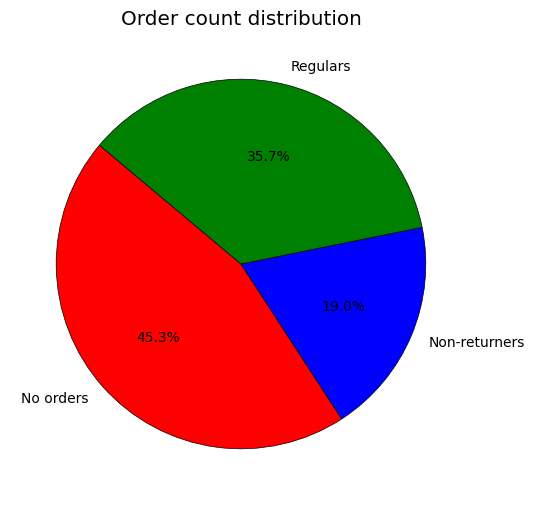

In [7]:
#print count for three different order count categories
print("Potential customers aka Registered Users without orders", (df['PURCHASE_COUNT'] == 0).sum())
print("Non-returners aka Registered Users with only one order:", (df['PURCHASE_COUNT'] == 1).sum())
print("Regulars aka users with more than one order:", (df['PURCHASE_COUNT'] > 1).sum())

# Categorizing purchase counts
categories = {
    'No orders': (df['PURCHASE_COUNT'] == 0).sum(),
    'Non-returners': (df['PURCHASE_COUNT'] == 1).sum(),
    'Regulars': (df['PURCHASE_COUNT'] > 1).sum()
}

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    categories.values(),
    labels=categories.keys(),
    autopct='%1.1f%%',  
    startangle=140,
    colors= ['red', 'blue', 'green'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Order count distribution')
plt.show()

Single biggest group is those who registered but have not made purchases yet. This is a shame as those people gives us very limited data. 


Because of my data is lacking among registered users without orders, I will focus on my analysis on those who have made at least one order. Later on I will make some remarks on those left out of analysis scope and make observations on their characteristics.

dataframe has been created that consist only of those that have atleast one order. Lets see how the customers are divided by the country in this data:

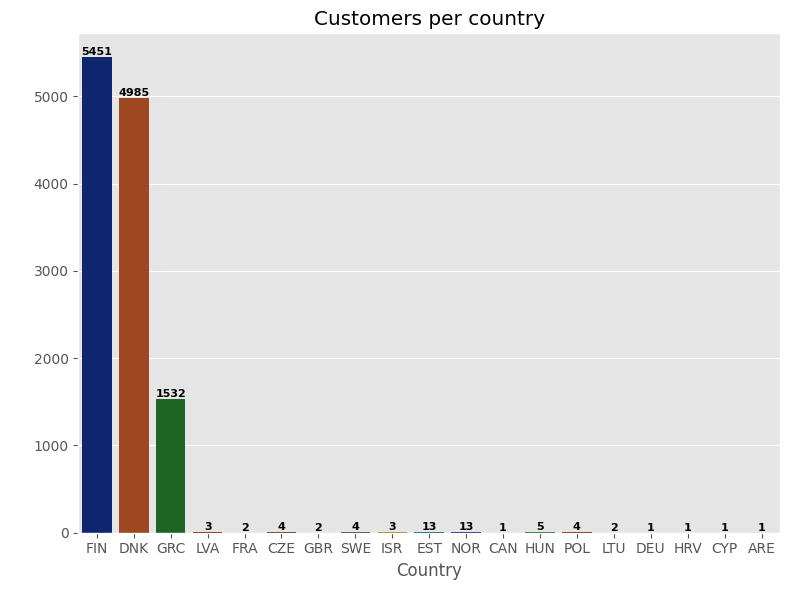

In [8]:
#data with only customers
df_customers =df[df['PURCHASE_COUNT'] >= 1]

#plot size and type
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='REGISTRATION_COUNTRY', data=df_customers, palette='dark')

# Add title and labels
plt.title('Customers per country')
plt.xlabel('Country')
plt.ylabel(' ')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Get the height (count) of each bar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position label at the center-top of the bar
        ha='center', va='bottom', color='black', fontsize=8, fontweight='bold'
    )

# Adjust layout
plt.tight_layout()

# Show the plot

plt.show()

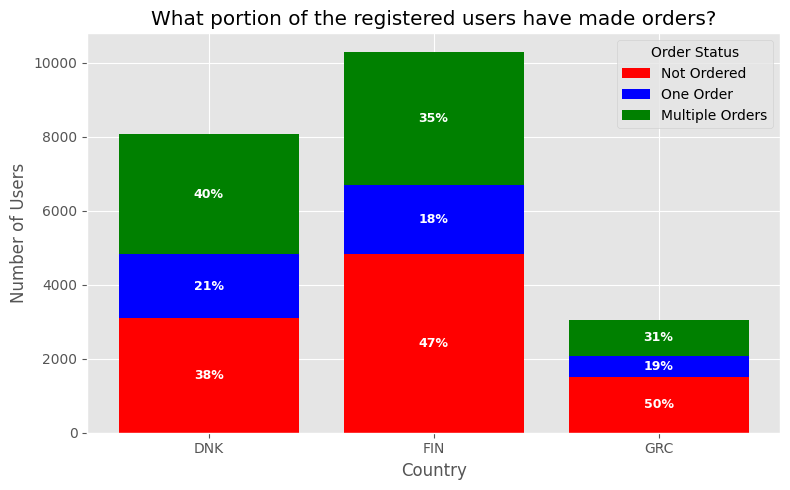

In [9]:
#Filter only 3 main countries
selected_countries = ['FIN', 'GRC', 'DNK']
df_filtered = df[df['REGISTRATION_COUNTRY'].isin(selected_countries)].copy()

#Define customer classes
def classify_user(x):
    if x == 0:
        return 'Not Ordered'
    elif x == 1:
        return 'One Order'
    else:
        return 'Multiple Orders'

df_filtered['ORDER_STATUS'] = df_filtered['PURCHASE_COUNT'].apply(classify_user)

#Group by country and customer classes
country_order_counts = df_filtered.groupby(['REGISTRATION_COUNTRY', 'ORDER_STATUS']).size().unstack(fill_value=0)

# Ensure consistent order of columns
order_categories = ['Not Ordered', 'One Order', 'Multiple Orders']
country_order_counts = country_order_counts[order_categories]

#Calculate percentages
country_order_percent = country_order_counts.div(country_order_counts.sum(axis=1), axis=0) * 100


fig, ax = plt.subplots(figsize=(8, 5))

#Define colors for each group
colors = {
    'Not Ordered': 'red',
    'One Order': 'blue',
    'Multiple Orders': 'green'
}

# Plot each group stacked
bottom = None
for status in order_categories:
    bars = ax.bar(
        country_order_counts.index,
        country_order_counts[status],
        label=status,
        bottom=bottom,
        color=colors[status]
    )
    
    # Add percentage labels
    for i, country in enumerate(country_order_counts.index):
        count = country_order_counts.loc[country, status]
        percent = country_order_percent.loc[country, status]
        if bottom is None:
            y_pos = count / 2
        else:
            y_pos = bottom[i] + count / 2
        if count > 0:
            ax.text(i, y_pos, f'{percent:.0f}%', ha='center', va='center', color='white', fontsize=9, fontweight='bold')
    
    # Update bottom for next stack
    if bottom is None:
        bottom = country_order_counts[status].values
    else:
        bottom += country_order_counts[status].values

#formatting
ax.set_title('What portion of the registered users have made orders?')
ax.set_ylabel('Number of Users')
ax.set_xlabel('Country')
plt.xticks(rotation=0)
ax.legend(title='Order Status')
plt.tight_layout()

plt.show()

99.9% of the customerbase comes from (or atleast registered in) Finland, Denmark and Greece with only handful of customers outside of these countries. Finland has most customers which is not suprising.

Most potential for growth are in Finland and Greece with roughly 50% of the registered users not having made any orders yet. Denmark leads in multiple order customer percentage which is always good sign of customer satisfaction.

Next I want to understand what sort of business is conducted mostly through this service. We did some data transformation earlier which comes handy right about now!


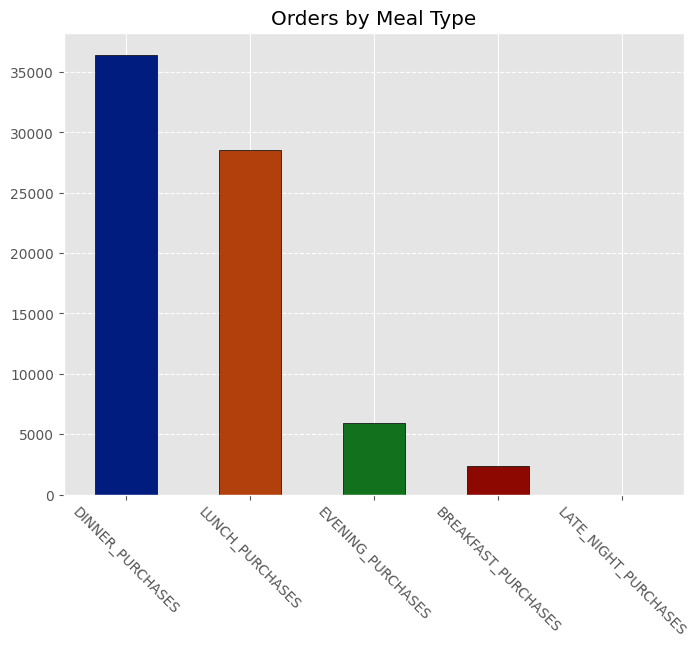

In [10]:
#Columns to include
columns_1= ['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'DINNER_PURCHASES', 'EVENING_PURCHASES', 'LATE_NIGHT_PURCHASES']
#sum order count on each order type
column_sums = df_customers[columns_1].sum().sort_values(ascending=False)

colors = sns.color_palette("dark", 5)
# Create bar chart
plt.figure(figsize=(8, 6))
column_sums.plot(kind='bar', edgecolor='black', color=colors)



# Formatting
plt.ylabel('')
plt.title('Orders by Meal Type')
plt.xticks(rotation=315) 
plt.grid(axis='y', linestyle='--')



plt.show()

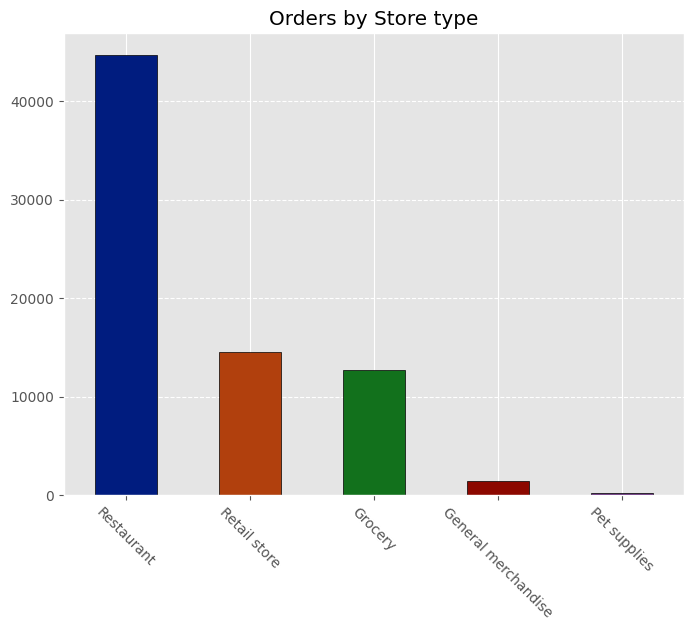

In [11]:
#Columns to include
columns_2= ['General merchandise','Grocery','Pet supplies','Restaurant','Retail store']
#sum order count on each order type
column_sums = df_customers[columns_2].sum().sort_values(ascending=False)

colors = sns.color_palette("dark", 5)

plt.figure(figsize=(8, 6))
column_sums.plot(kind='bar', edgecolor='black', color=colors)



# Formatting
plt.ylabel('')
plt.title('Orders by Store type')
plt.xticks(rotation=315) 
plt.grid(axis='y', linestyle='--')




plt.show()

Not suprisingly restaurants dominate here with rest of the categories combined being only a half of its count. Clearly food delivery service is biggest part of this business. Retail and grocery stores are significant factors aswell, both coming with over ten thousand orders.

Since restaurants are dominatinf, its interesting to see what sort of meals are in most demand.

As noted earlier, dinner and lunch are most ordered meals by a quite significant margin.

Next I want to understand timing of the orders little better. When are the orders made and what are the busiest days. This dataset is actually not best describing this as we only have most common day and hour for each cutomer and no way to distinguish when all their order have been made. 

But we do what we can with what we have!

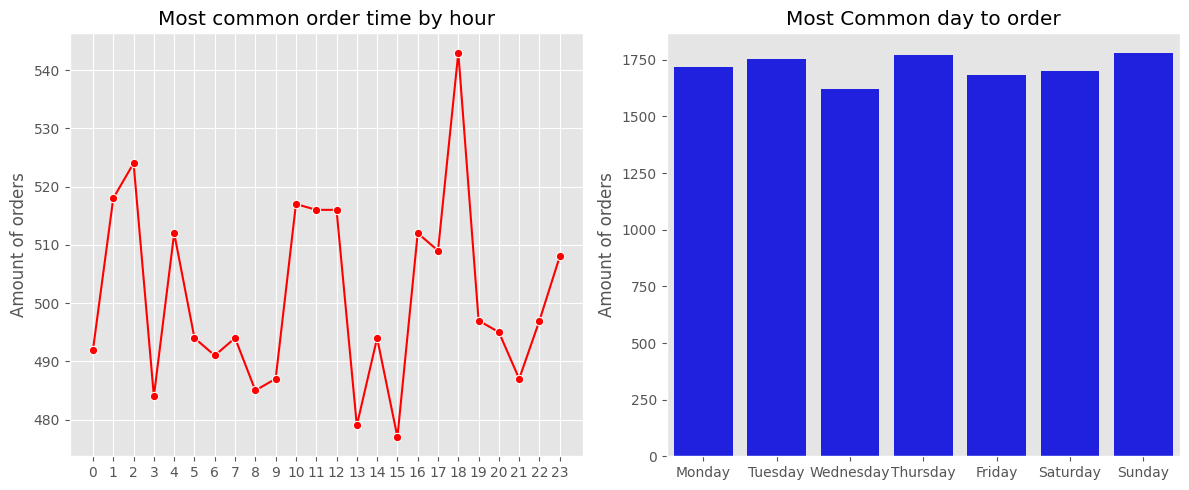

In [12]:
#weekdays are 1-7 in dataset but Python requires 0-6 format
df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] = df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] - 1

#Count occurrences of each hour
hourly_counts = df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].value_counts().sort_index()

#Count occurrences of each weekday and map to actual day names
weekday_counts = df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts().sort_index()
weekday_counts.index = [calendar.day_name[int(i)] for i in weekday_counts.index] 


fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

#Lineplot for common hours to order
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='r', ax=axes[0])
axes[0].set_xticks(range(24))  # Ensure all hours (0-23) are shown
axes[0].set_title('Most common order time by hour')
axes[0].set_ylabel('Amount of orders')
axes[0].grid(True)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#Barchart for common days to order
sns.barplot(x=weekday_counts.index, y=weekday_counts.values,order=days_order,color='blue', ax=axes[1])
axes[1].set_title('Most Common day to order')
axes[1].set_ylabel('Amount of orders')
axes[1].grid(axis='y')

plt.tight_layout()

# Show the plots
plt.show()

This is very interesting information that we should consider carefully. Firt of all, left plot shows which hours are most common among customers. Highest count is at 18 and by quite a margin to next one. This is not suprising as Dinner purchases were most common group in meal types. What is more suprising is the fact that next 2 most common hours are 1 and 2, basically middle of the night! do customers actually make lunch plans at those hours or is there something else behind this, that would be interesting to find out. 

Among least common hours are 13 and 15 which being right after common lunch time is not biggest suprise. Overall this graph paints quite interesting picture and with more richer dataset it would be interesting to dive in the nuances behind it.

On the plot right, we get interesting results from very uninteresting picture. Plot shows which days are most common among customers to make orders and its just really even along the board. Saturdays and Tuesdays seem to lead the pack with friday coming at lat place but none of them really stands out in any fashion. Days of the week seem to be irrelevant for amount of orders made.

Seeing the interesting lineplot, I want to take a little closer look on it by dividing it to different countries. Since this dataset had major focus on Finland, Denmark and Greece, I will only include them in this plot.

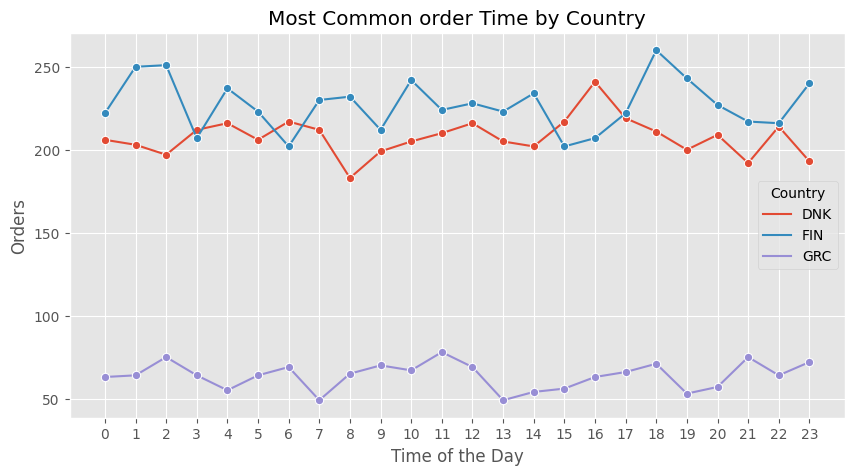

In [13]:

#Count occurrences of each hour for each country
hourly_counts = df_filtered.groupby(['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE', 'REGISTRATION_COUNTRY']).size().reset_index(name='Count')


plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_counts, x='MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE', y='Count', hue='REGISTRATION_COUNTRY', marker='o')

#Formatting
plt.xticks(range(24)) 
plt.title('Most Common order Time by Country')
plt.xlabel('Time of the Day')
plt.ylabel('Orders')
plt.legend(title='Country')  
plt.grid(True)

# Show the plot
plt.show()

Different countries have slightly different graphs when it comes to most common hours of orders. For Finland most common hour is 18 with Denmark having 16 as the most common. Greece have their most common hour at 11. The interesting insight earlier for most common hours being 1 and 2 is seemingly driven by Finland with Denmark having downward trend at those hours.

Timing of the orders are interesting and valuable information but don't tell the whole story. As a food delivery business eager to grow we want to understand little better how we can acquire more customers. Understanding when first purchases are made is crucial first step.

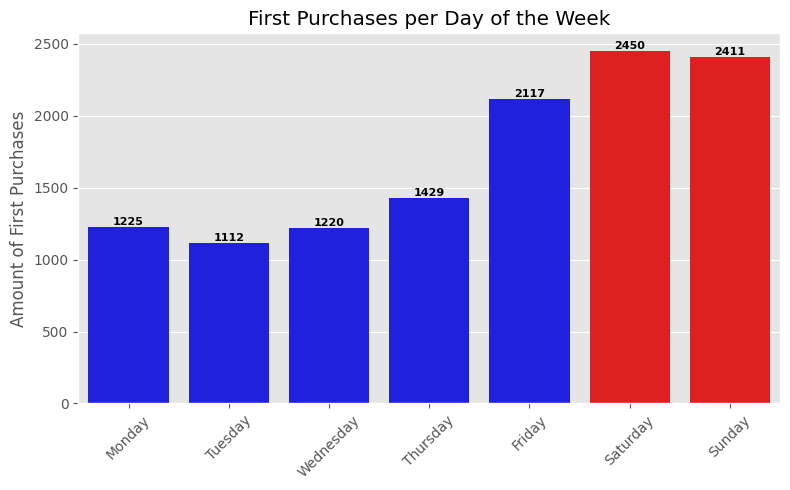

In [14]:
# Change datatype to datetime
df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])

# Extract the weekday
df['WEEKDAY'] = df['FIRST_PURCHASE_DAY'].dt.weekday  

# Define order for days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Map numerical weekdays to actual names
df['WEEKDAY_NAME'] = df['WEEKDAY'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                                        4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Set plot size
plt.figure(figsize=(8, 5))

day_colors = ['blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red']
# Create bar plot
ax = sns.countplot(x='WEEKDAY_NAME', data=df, order=days_order, palette=day_colors )

# Add title and labels
plt.title('First Purchases per Day of the Week')
plt.xlabel('')
plt.ylabel('Amount of First Purchases')
plt.xticks(rotation=45)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center', va='bottom', color='black', fontsize=8, fontweight='bold'
    )

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

This plot shows quite clearly that weekends are where the new customers are made. From roughly 12 thousand customers, almost five thousand made their first purchase on weekend. And if we include over two thousand first purchases from weekend, is the picture quite clear. While earlier plot showed that amount of orders varies very little between days, this new plot demonstrates that acquiring new customers depends heavily on day of the week.

Speaking of new customers, I think its interesting to see what has been the development among acquiring new customers in this dataset and alternatively how many customers have left the service in the same time span. 

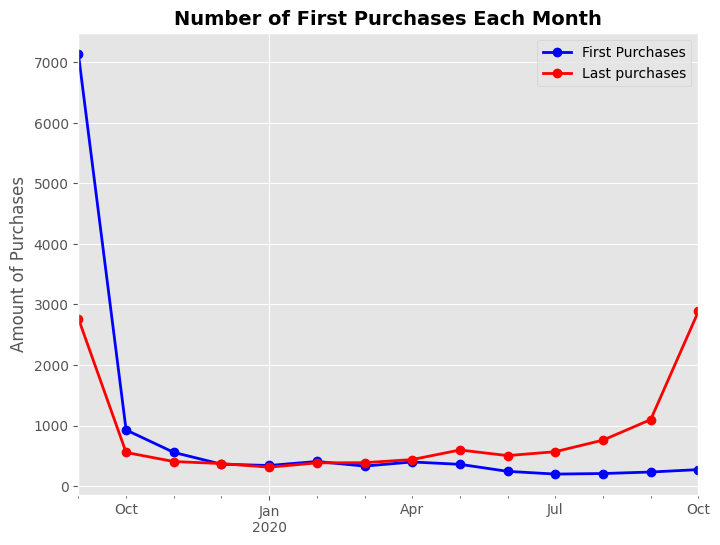

In [15]:
# Extract Year-Month from First and Last purchases
df['Year-Month'] = df['FIRST_PURCHASE_DAY'].dt.to_period('M')
df['Year-Month1'] = df['LAST_PURCHASE_DAY'].dt.to_period('M')


# Group by Year-Month and count the number of purchases
monthly_counts = df['Year-Month'].value_counts().sort_index()
monthly_counts1 = df['Year-Month1'].value_counts().sort_index()
# Create line plot
plt.figure(figsize=(8, 6))
monthly_counts.plot(kind='line', marker='o', color='b', linewidth=2, label="First Purchases")
monthly_counts1.plot(kind='line', marker='o', color='r', linewidth=2, label="Last purchases")

# Formatting
plt.title('Number of First Purchases Each Month', fontsize=14, fontweight='bold')
plt.ylabel('Amount of Purchases', fontsize=12)
plt.grid(True)
plt.legend( )

# Show the plot
plt.show()

This plot tells interesting story about how first and last purchases have been developing. Plot shows that since March 2020 this service have seen more last purchases than first purchases, meaning service have lost more customers than it has been gaining. This is worrysome development and something we want to definitely stop. Part of this development is due the data and how it only shows just over a year of data. But one can't deny service have been losing customers overall. 

To understand better this development, I want to plot the percentage of customers who became "regualars" for the service. I use word regulars very loosely here and only mean customers who made more than one purchase. Little stricter criteria could be in order but I don't want to make it too complicated.

Average days between purchases is 64.2935393258427


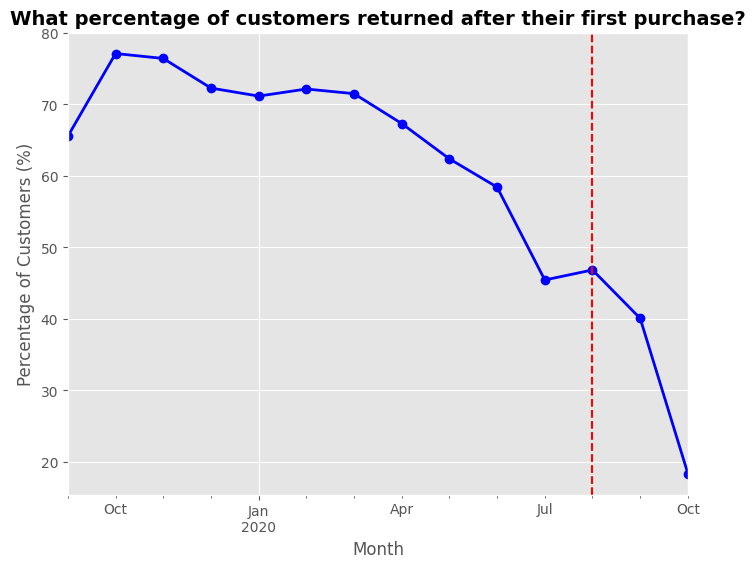

In [16]:
#Customers who made more than 1 order
df['More_Than_1_Order'] = df['PURCHASE_COUNT'] > 1

# Calculate the average of AVG_DAYS_BETWEEN_PURCHASES
avg_days = df['AVG_DAYS_BETWEEN_PURCHASES'].mean()

# Find the latest date in the dataset
end_date = df['FIRST_PURCHASE_DAY'].max()

# Calculate the date that is 'avg_days' before the end date
line_date = end_date - pd.Timedelta(days=avg_days)

# Group by Year-Month and calculate percentage of customers who made more than 1 order
monthly_percentage = df.groupby('Year-Month').apply(
    lambda x: (x['More_Than_1_Order'].sum() / len(x)) * 100
)

# Create line plot
plt.figure(figsize=(8, 6))
monthly_percentage.plot(kind='line', marker='o', color='b', linewidth=2)

# Add the line for the average days before the end date
plt.axvline(x=line_date, color='r', linestyle='--', label=f'Avg Days ({avg_days:.2f})')

# Formatting
plt.title('What percentage of customers returned after their first purchase?', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)

plt.grid(True)

# Show the plot
print("Average days between purchases is", avg_days)
plt.show()

This plot show, what percentage of customers made more than 1 order given the month of their first purchase.For Example from custoemrs that made their first purchase in October 2019, roughly 77% of them have more than 1 orde rin their name. We see downward trend starting around march 2020 all the way until end of dataset.

Part of this trend is due the fact that dataset ends at October 2020 and most recent customers have not had time to place new orders quite yet. To mititgate this issue, I drew red dashed line on x-axis which represents point 2 months prior the end of dataset. This is roughly the average of Aerage days between orders acquired from dataset. Th idea of is simple: on the right side of the line we have customers who have more potential to become regulars. They made their orders so recently that on average, they haven't had enough time to become regulars quite yet. On the left side of the line, we have customers who already ahd enough time. If they were to become regulars, they would have done it already on average. 

This line roughly demonstrates the fact that lack of new regulars is not simply due the fact of how dataset is constructed. While there have been consistent amount of new customers, there have been less and less customers who have become regulars.

In order to acquire more customers, we need to understand their behaviour better.

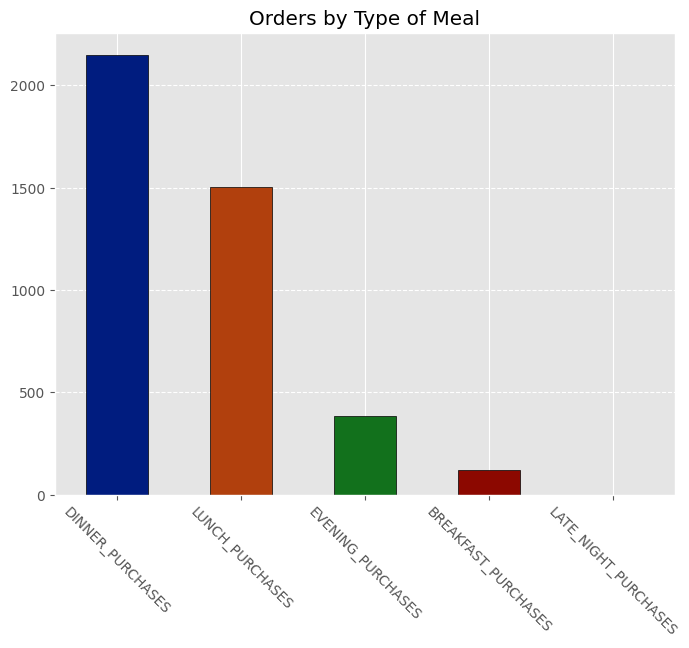

In [17]:
df_nonreturners =df[df['PURCHASE_COUNT'] == 1]
column_sums = df_nonreturners[columns_1].sum().sort_values(ascending=False)

colors = sns.color_palette("dark", 5)
# Create bar chart
plt.figure(figsize=(8, 6))
column_sums.plot(kind='bar', edgecolor='black', color=colors)



# Formatting
plt.ylabel('')
plt.title('Orders by Type of Meal')
plt.xticks(rotation=315) 
plt.grid(axis='y', linestyle='--')



plt.show()

Meal types are roughly the same as previously. Those who only made one order have mostly dinner purchases with lunch coming as second.

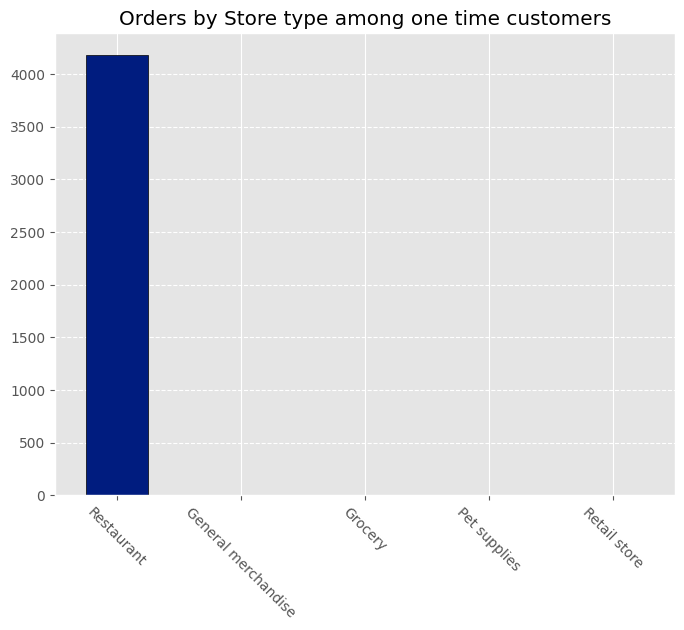

In [18]:
column_sums = df_nonreturners[columns_2].sum().sort_values(ascending=False)


plt.figure(figsize=(8, 6))
column_sums.plot(kind='bar', edgecolor='black', color=colors)



# Formatting
plt.ylabel('')
plt.title('Orders by Store type among one time customers')
plt.xticks(rotation=315) 
plt.grid(axis='y', linestyle='--')




plt.show()

Now this is quite interesting graph and tells clear tale: one time customers only use this service for restaurant orders  and nothing else. Reasons could be wide variety behind this, maybe they had one time promotional offer that was so good they made one order and called it a day. Maybe their order process was non-satisfactory and thus these customers didn't return. What ever it may be, its quite fascinating that no of the nonreturners ordered from anywhere else than restaurants. There may e potential for growth if ths service can acquire more customers especially on the other stores.

Understanding purchase patterns is good way to understand what customers like and therefore how to potentially acquire new customers.

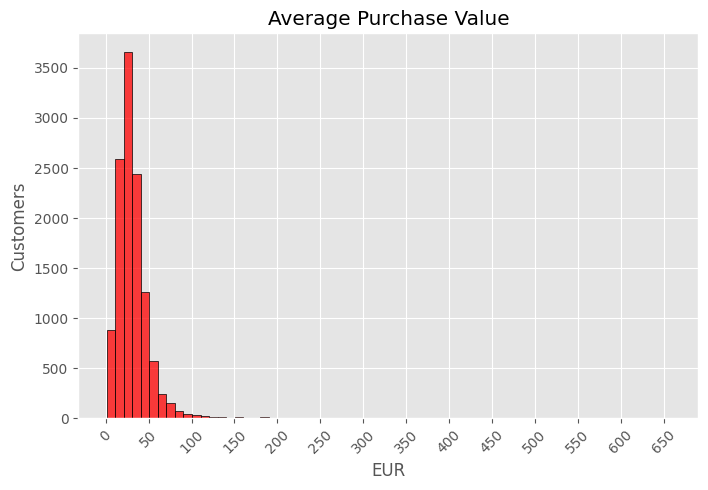

In [19]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create histogram
sns.histplot(df['AVG_PURCHASE_VALUE_EUR'], bins=66, color='r', edgecolor='black')

# Add title and labels
plt.title('Average Purchase Value')
plt.xlabel('EUR')
plt.ylabel('Customers')

# Set x-ticks every 50 units
plt.xticks(np.arange(start=0, stop=660, step=50), rotation=45)

# Show the plot
plt.grid(True)  # Add grid for readability
plt.show()

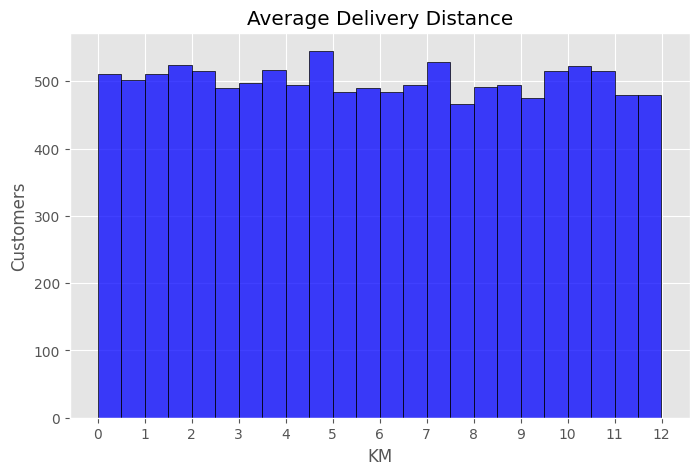

In [20]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create histogram
sns.histplot(df['AVERAGE_DELIVERY_DISTANCE_KMS'], bins=24, color='b', edgecolor='black')

# Add title and labels
plt.title('Average Delivery Distance')
plt.xlabel('KM')
plt.ylabel('Customers')

plt.xticks(np.arange(start=0, stop=12.5, step=1))

plt.grid(True)  
plt.show()

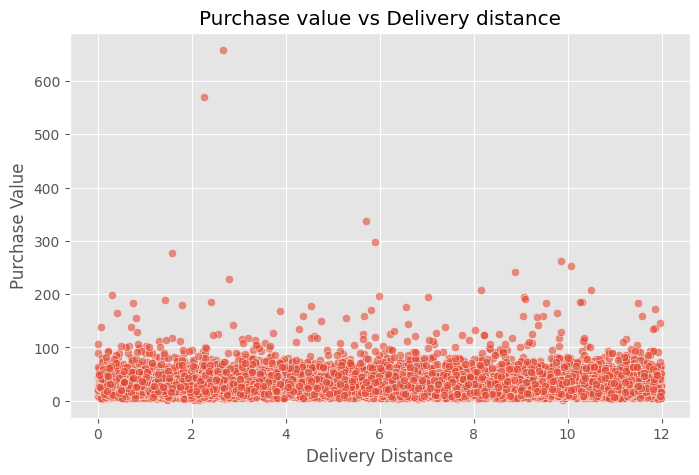

In [21]:


plt.figure(figsize=(8, 5))


sns.scatterplot(y=df['AVG_PURCHASE_VALUE_EUR'], x=df['AVERAGE_DELIVERY_DISTANCE_KMS'], alpha=0.6)

# Add title and labels
plt.title('Purchase value vs Delivery distance')
plt.xlabel('Delivery Distance')
plt.ylabel('Purchase Value')


plt.grid(True)

# Show the plot
plt.show()

Average purchase values are strongly around 20-30 euros which sounds totally reasonable. The shape shows the potential issue of outliers but just like previously, we need to live with them for now. If I were to create some sort of regression models for example I would probably need to drop some customers who show very high average purchase values. For this assignment and the type of data I will just let them be.

Average delivery distance don't seem to have any preferred value among the customers. Values go pretty evenly from 0 to 12 KMs and that does seem logical too. Since this service is used mostly for deliveries, customers don't care that much about how long the delivery distance is: purchased product will find its way to their homes regardless. 

This is shown in the scatter plot too between value and distance. No patterns can be detected meaning customers are pretty liberal when it comes to delivery distance. 

Next I want to understand little better how usage of this service affects the value of purchase. I will look average values of purchases for customers who only buy from one place versus those who have multiple order locations. I only look customers who made multiple orders just to avoid one time orderers biasing the results.

There are 724 customers with more than one order and only one order location with average purchase value of 28.40029834254144 euros
There are 5150 customers with more than one order and only one order location with average purchase value of 31.458855145631073 euros
There are 1387 customers with more than one order and only one order location with average purchase value of 30.32278875270368 euros


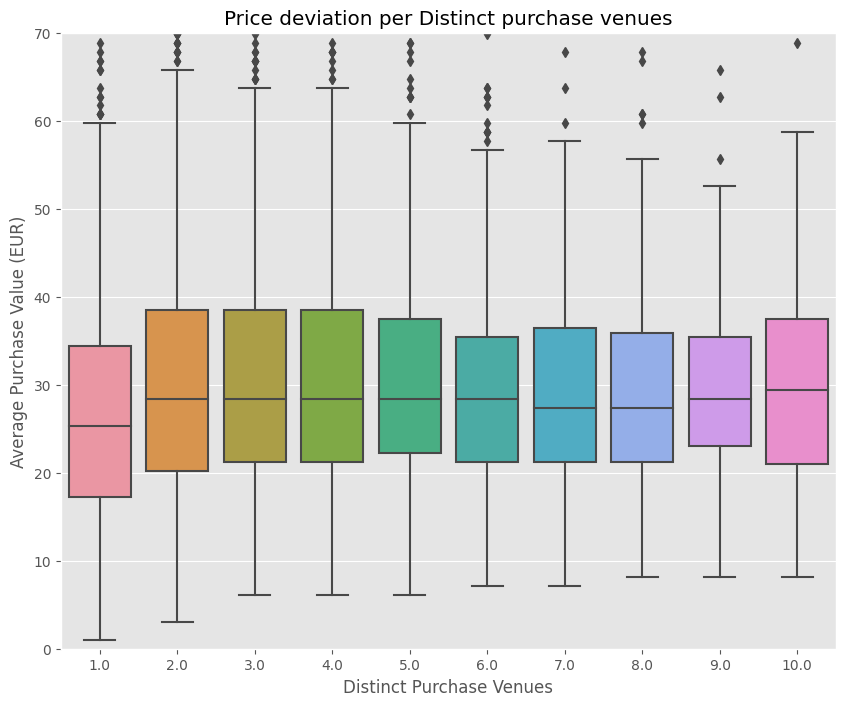

In [22]:
#Customers with more than one purchase
df_returners =df[(df['PURCHASE_COUNT'] > 1) & (df['DISTINCT_PURCHASE_VENUE_COUNT']<=10)]

#Customers who bought from one place only
df_returners_venuecount_1 =df_returners[df_returners['DISTINCT_PURCHASE_VENUE_COUNT'] == 1]
#Customers with 2 to 5 unique venues
df_returners_venuecount_2_5 =df_returners[(df_returners['DISTINCT_PURCHASE_VENUE_COUNT'] >= 2) 
                                          & (df_returners['DISTINCT_PURCHASE_VENUE_COUNT'] <= 5)]
#Customers with atleast 6 unique venues
df_returners_venuecount_6 =df_returners[df_returners['DISTINCT_PURCHASE_VENUE_COUNT'] >= 6]

print("There are", len(df_returners_venuecount_1),"customers with more than one order and only one order location with average purchase value of",df_returners_venuecount_1['AVG_PURCHASE_VALUE_EUR'].mean(), "euros")
print("There are", len(df_returners_venuecount_2_5),"customers with more than one order and only one order location with average purchase value of",df_returners_venuecount_2_5['AVG_PURCHASE_VALUE_EUR'].mean(), "euros")
print("There are", len(df_returners_venuecount_6),"customers with more than one order and only one order location with average purchase value of",df_returners_venuecount_6['AVG_PURCHASE_VALUE_EUR'].mean(), "euros")

#Formatting
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_returners, x='DISTINCT_PURCHASE_VENUE_COUNT', y='AVG_PURCHASE_VALUE_EUR')
ax.set_title('Price deviation per Distinct purchase venues')
ax.set_xlabel('Distinct Purchase Venues')
ax.set_ylabel('Average Purchase Value (EUR)')
ax.set_ylim(0, 70)
plt.show()


This plot shows interesting dynamics. First of all the categories show potential outliers again(lots of them being outside this pic). This is one reason why boxplot works quite well for this task: we can focus on values that showcase majority of the customers and how they are distributed in data without the need for addressing outliers quite yet.

Customers who buy only from one location are generally using less money on their pruchases than those who have been buying from multiple lcoations. Difference don't seem so big visually but looking numbers its pretty much 10% increase on average per purchase. Thjat is a lot and should be taken in to account when planning promotional campaigns. We want customers to buy from multiple places to generate bigger purchases.

## The end

In this notebook I completed data exploration task and found some gret insights about this delivery service. I go little more to the detail in my presentation file but for now, thank you for reader and see you next time!